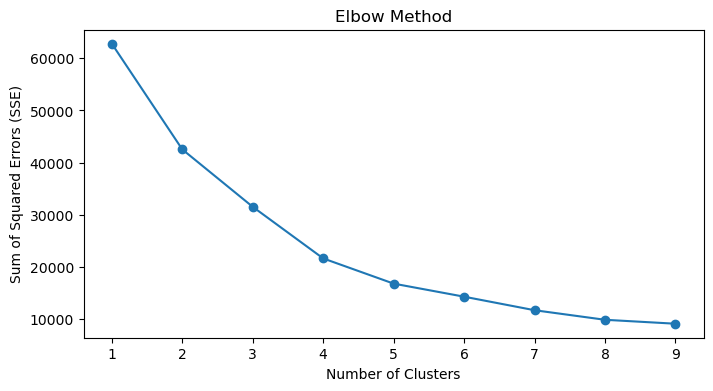

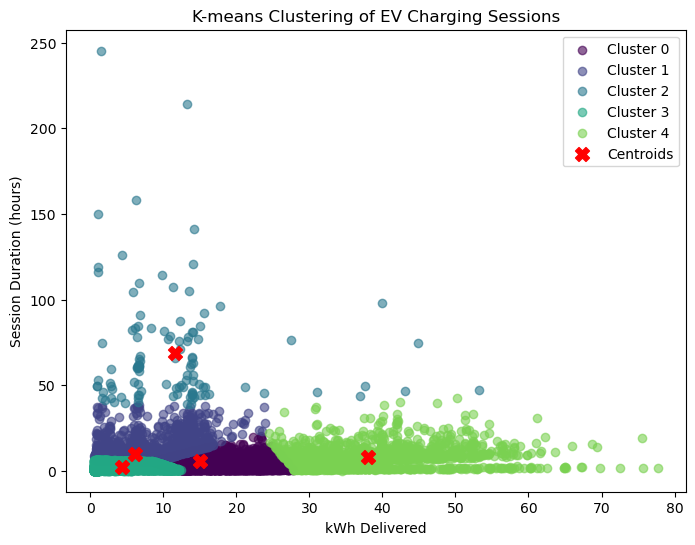

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load datase
df1 = pd.read_csv('YEAR/sessions_filtered_2018.csv')
df2 = pd.read_csv('YEAR/sessions_filtered_2019.csv')
df3 = pd.read_csv('YEAR/sessions_filtered_2020.csv')
df4 = pd.read_csv('YEAR/sessions_filtered_2021.csv')

# datasets in 1 DataFrame
data = pd.concat([df1, df2, df3, df4], ignore_index=True)

#  session duration (cfdifference in disconnecttime and connecttime and then to hours)
data['connectionTime'] = pd.to_datetime(data['connectionTime'], errors='coerce')
data['disconnectTime'] = pd.to_datetime(data['disconnectTime'], errors='coerce')
data['SessionDuration'] = (data['disconnectTime'] - data['connectionTime']).dt.total_seconds() / 3600

features = data[['kWhDelivered', 'SessionDuration']].dropna()

# Normalize z-scores
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

#elbow method
sse = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

# elbow method plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.show()

# use 5 cluster on elbow method
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_final.fit_predict(features_scaled)
features['Cluster'] = clusters

#making a plot figure for k-means
plt.figure(figsize=(8, 6))

cmap = plt.get_cmap('viridis')
colors = [cmap(i / optimal_k) for i in range(optimal_k)]

for i in range(optimal_k):
    cluster_data = features[features['Cluster'] == i]
    plt.scatter(cluster_data['kWhDelivered'], cluster_data['SessionDuration'], 
                color=colors[i], label=f'Cluster {i}', alpha=0.6)

centers = scaler.inverse_transform(kmeans_final.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='X', label='Centroids')

plt.xlabel('kWh Delivered')
plt.ylabel('Session Duration (hours)')
plt.title('K-means Clustering of EV Charging Sessions')
plt.legend()
plt.show()
